In [1]:
# -*- encoding: utf-8 -*-
""" Application 1 of Module 1 - Analysis of Citation Graphs """

import random
import urllib2
import _01_Project_1 as pro_1
import alg_dpa_trial as DPA
import matplotlib.pyplot as plt

In [2]:
# LOADING THE GRAPH (provided code)
CITATION_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt"

def load_graph(graph_url):
    """ Function that loads a graph given the URL for a text representation of the graph Returns a dictionary that models a graph """
    graph_file = urllib2.urlopen(graph_url)
    #graph_file = graph_url  # this if the version for local files, just for testing
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[: -1]  # this is just to remove the last empty line at the end

    print "Loaded graph with", len(graph_lines), "nodes"

    answer_graph = {}
    for line in graph_lines:  # we will now append each line to the 'answer_graph' dictionary
        neighbors = line.split(' ')
        node = int(neighbors[0])  # the first number in each line is going to be a NODE in the GRAPH
        answer_graph[node] = set([])
        for neighbor in neighbors[1: -1]:  # all other numbers in that line are NODES that come into the parent NODE, they are going to be the VALUES in the dictionary
            answer_graph[node].add(int(neighbor))

    return answer_graph

Loaded graph with 27770 nodes


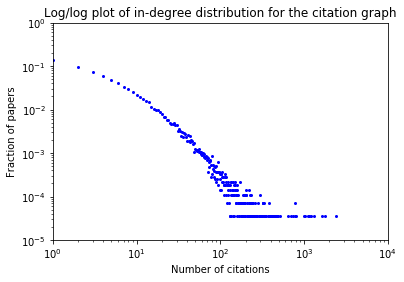

In [3]:
# QUESTION 1
# Your task for this question is to compute the in-degree distribution for this citation graph. Once you have computed this distribution, you should normalize the distribution
# (make the values in the dictionary sum to one) and then compute a log/log plot of the points in this normalized distribution. How you create this point plot is up to you.
def normalized_distribution(digraph):
    """ Returns a graph with normalized distribution of in-degrees """
    distribution = pro_1.in_degree_distribution(digraph)
    normalized = dict.fromkeys(distribution)  # now we can initialize the result dictionary and copy the kays from 'distribution'
    values_sum = sum(distribution.values())  # this is to get the total amount of values for normalization

    for degree in distribution:
        normalized[degree] = distribution[degree] / float(values_sum)  # "..you should normalize the distribution (make the values in the dictionary sum to one)"
    # print(sum(normalized.values()))  # this should now return 1

    return normalized


def run_question_1():
    citation_graph = load_graph(CITATION_URL)

    digraph = normalized_distribution(citation_graph)  # the normalized version shows the proportional amount of papers (sum = 1) per given amount of citations
    # digraph = pro_1.in_degree_distribution(citation_graph)  # this option shows us the real number of papers per given amount of citations

    plt.loglog(digraph.keys(), digraph.values(), color='blue', marker='.', linestyle='None', linewidth=0, markersize=4); plt.axis([1, 10000, 0.00001, 1])  # the logarithmic scale deforms the axis, no real numbers here
    # plt.plot(digraph.keys(), digraph.values(), color='blue', marker='.', linestyle='None', linewidth=0, markersize=4)  # this version will plot real numbers

    plt.title("Log/log plot of in-degree distribution for the citation graph")
    plt.xlabel("Number of citations")
    plt.ylabel("Fraction of papers")
    plt.show()

run_question_1()

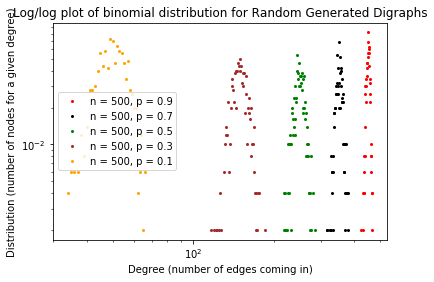

In [4]:
# QUESTION 2
# For this question, your task is to consider the shape of the in-degree distribution for an ER graph and compare its shape to that of the physics citation graph.
# In the homework, we considered the probability of a specific in-degree, k, for a single node. Now, we are interested in the in-degree distribution for the entire ER graph.
# To determine the shape of this distribution, you are welcome to compute several examples of in-degree distributions or determine the shape mathematically.
def random_digraph(num_nodes, probability):
    """ Function for creating random graphs """
    digraph = {}
    for i in range(num_nodes):  # we use two loops here to simulate an interaction between every two nodes (except for interacting with itself)
        digraph[i] = set()
        for j in range(num_nodes):
            a = random.random()
            if a < probability and i != j:  # this simulates the creation of ER graph for a given probability
                digraph[i].add(j)

    return digraph


def run_question_2():
    probabilities = [(0.9, "red"), (0.7, "black"), (0.5, "green"), (0.3, "brown"), (0.1, "orange")]
    nodes = 500
    legend_active = []  # we have to gather the on-screen labels in a loop as we go

    plt.title("Log/log plot of binomial distribution for Random Generated Digraphs")
    plt.xlabel("Degree (number of edges coming in)")
    plt.ylabel("Distribution (number of nodes for a given degree)")

    for pair in probabilities:
        rnd_digraph = random_digraph(nodes, pair[0])
        legend_active.append("n = " + str(nodes) + ", p = " + str(pair[0]))

        digraph = normalized_distribution(rnd_digraph)  # in a normalized graph, the total number of nodes for all occurring number of edges is 1 (on 'y' axis)
        # digraph = pro_1.in_degree_distribution(digraph)  # in a non-normalized version, the real number of nodes with a specific number of edges is shown
        # digraph = pro_1.compute_in_degrees(digraph)  # this is just a simple in-degree example of how the data spreads across the nodes

        plt.loglog(digraph.keys(), digraph.values(), color=pair[1], marker='.', linestyle='None', linewidth=0, markersize=4)
        # plt.plot(digraph.keys(), digraph.values(), color=pair[1], marker='.', linestyle='None', linewidth=0, markersize=4)  # here we can see how the number of edges changes as we change probability

    plt.legend(legend_active)
    plt.show()

run_question_2()

# Item a (1 pt) Is the expected value of the in-degree the same for each node in an ER graph?
# Answer: Yes. The ER algorithm treats each node in the graph in the same manner. So the expected value of the in-degree for each node must be the same. In fact, the in-degree distribution is the same for each node.

# Item b (1 pt) What does the in-degree distribution for an ER graph look like? Provide a short written description of the shape of the distribution.
# Answer: As noted in the Homework, the in-degree of an arbitrary node in a directed ER graph is binomially distributed. Therefore, the in-degree distribution for the entire graph must also be binomial.

# Item c (1 pt) Does the shape of the in-degree distribution plot for ER look similar to the shape of the in-degree distribution for the citation graph? Provide a short explanation of the similarities or differences.
# No. The two distributions are not similar. The in-degree distributions for ER graphs are binomial (bump-shaped) and are substantially different from the linear shape of in-degree distributions for citation graphs.

# Conclusion: Citation graphs are not generated by a purely random process. If they were, we would expect the in-degree distribution for the citation graph to be similar to the in-degree distribution for the ER graphs.
# However, the distributions for ER graphs are binomial (bump-shaped) while the distribution for the citation graph is almost linear.

In [5]:
# QUESTION 3
# For this question, we will choose values for nn and mm that yield a DPA graph whose number of nodes and edges is roughly the same to those of the citation graph.
# For the nodes, choosing n to be the number of nodes as the citation graph is easy. Since each step in the DPA algorithm adds m edges to the graph, a good choice for m is an integer that is close
# to the average out-degree of the physics citation graph. For this question, provide numerical values for n and m that you will use in your construction of the DPA graph.
def compute_edges(digraph):
    total_edges = map(len, digraph.values())
    result = sum(total_edges)
    return result


def run_question_3():
    digraph = load_graph(CITATION_URL)
    nodes = len(digraph.keys())
    edges = compute_edges(digraph)
    print "The number of nodes in the citation graph is: ", nodes
    print "The number of edges in the citation graph is: ", edges
    print "The average degree of the citation graph is: ", edges // nodes

run_question_3()

# Item a (1 pt) What is the number of nodes n in the desired DPA graph?
n = 27000  # The value of 'n' is the number of papers in the citation graph, which is 27770. Since the text asked for a rough value, score values for n between 27000 and 28000 as being correct

# Item b (1 pt) What is the value of m in the desired DPA graph?
m = 12  # 352768 total edges and 27770 total nodes. So the average out-degree is approximately 12.7. Since m must be an integer, the answer may be either m = 12 or m = 13.

Loaded graph with 27770 nodes
The number of nodes in the citation graph is:  27770
The number of edges in the citation graph is:  352768
The average degree of the citation graph is:  12


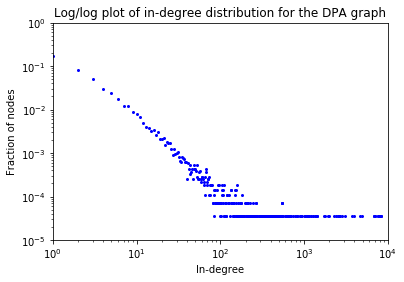

In [6]:
# QUESTION 4 
# Your task for this question is to implement the DPA algorithm, compute a DPA graph using the values from Question 3, and then plot the in-degree distribution for this DPA graph.
# The DPA algorithm starts by creating a complete directed graph on 'm' nodes. (Note, you've already written the code for this part in the Project.) Then, the algorithm grows the graph by adding
# n−m nodes, where each new node is connected to 'm' nodes randomly chosen from the set of existing nodes. As an existing node may be chosen more than once in an iteration, we eliminate
# duplicates (to avoid parallel edges); hence, the new node may be connected to fewer than m existing nodes upon its addition.
def dpa(n, m):
    assert 1 <= m <= n
    digraph = pro_1.make_complete_graph(m)  # we first make a complete directed graph as we did in QUESTION 2, without the probability factor
    dpa_obj = DPA.DPATrial(m)  # we then create a base for DPA with 'm' number of nodes and probability that goes with it
    for i in range(m, n):  # now we create the remaining part of the graph to get to 'n' elements
        digraph[i] = dpa_obj.run_trial(m)  # each time we call 'run_trial' we use the constant amount of new edges 'm' choosing randomly from the existing elements therefore the initial nodes (0-m) will be cited the most
    return digraph  # this will represent the 'rich gets richer' distribution where the initial, most visible elements are choosen much more often


def run_question_4():
    dpa_digraph = dpa(27770, 12)

    digraph = normalized_distribution(dpa_digraph)  # in a normalized graph, the total number of nodes for all occurring number of edges is 1 (on 'y' axis)
    # digraph = pro_1.in_degree_distribution(digraph)  # in a non-normalized version, the real number of nodes with a specific number of edges is shown
    # digraph = pro_1.compute_in_degrees(digraph)  # this is just a simple in-degree example of how the data spreads across the nodes

    plt.loglog(digraph.keys(), digraph.values(), color='blue', marker='.', linestyle='None', linewidth=0, markersize=4); plt.axis([1, 10000, 0.00001, 1])  # the logarithmic scale deforms the axis, no real numbers here but it looks sensible
    # plt.plot(digraph.keys(), digraph.values(), color='blue', marker='.', linestyle='None', linewidth=0, markersize=4)  # this version will plot real numbers, but it doesn't look like anything useful

    plt.title("Log/log plot of in-degree distribution for the DPA graph")
    plt.xlabel("In-degree")
    plt.ylabel("Fraction of nodes")
    plt.show()

run_question_4()

Loaded graph with 27770 nodes


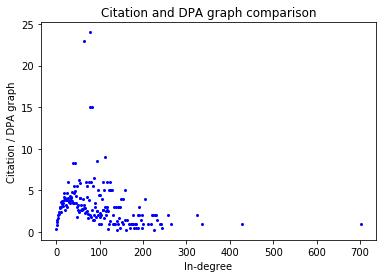

In [7]:
# QUESTION 5
# In this last problem, we will compare the in-degree distribution for the citation graph to the in-degree distribution for the DPA graph as constructed in Question 4.
# In particular, we will consider whether the shape of these two distributions are similar and, if they are similar, what might be the cause of the similarity.
def merge_data(citation_graph, DPA):
    merged = {}  # for the merge to work we have to make sure that the x and y for both dictionaries are of the same size, for 'x' it is easy, as we can adjust the random generator to match exactly the number of keys in CG
    keys = citation_graph.keys()
    for key in keys:
        if key in DPA:
            merged[key] = citation_graph[key] / float(int(DPA[key]))  # if we find the same amount of distribution then we compare both values by dividing them
    return merged


def run_question_5():
    citation_graph = load_graph(CITATION_URL)
    citation_graph_dist = pro_1.in_degree_distribution(citation_graph)
    dpa_graph = dpa(27770, 12)
    dpa_graph_dist = pro_1.in_degree_distribution(dpa_graph)

    merged = merge_data(citation_graph_dist, dpa_graph_dist)
    plt.plot(merged.keys(), merged.values(), color='blue', marker='.', linestyle='None', linewidth=0, markersize=4)  # the 'loglog' plot is not applicable in this case

    plt.title("Citation and DPA graph comparison")
    plt.xlabel("In-degree")
    plt.ylabel("Citation / DPA graph")
    plt.show()

run_question_5()

# Item a (1 pt) Is the plot of the in-degree distribution for the DPA graph similar to that of the citation graph?
# The plot of the in-degree distribution of the DPA graph is indeed similar to that of the citation graph. They agree on all of the items listed in item c for Question 1. In particular, the points in both plots are
# accurately approximated by a line with falling (negative) slope. In both cases, the points tend to scatter more as the fraction of points (papers) decreases.

# Item b (1 pt) Which one of the three social phenomena listed above mimics the behavior of the DPA process? Provide a short explanation for your answer.
# Historically, this answer has generated vigorous disagreement by a small number of students who have argued for "Hierarchical structure of networks" or "Six degrees of separation". Since the answer to this question
#  is more subjective than usual, you should also give credit to answers that cite the "Hierarchical structure of networks" or "Six degrees of separation" as long as the answer provides an explanation for that choice.

# Item c (1 pt) Could one of these phenomena explain the structure of the physics citation graph? Provide a short explanation for your answer.
# The "Rich get richer" phenomenon provides an explanation for the structure of the citation graph. Papers (nodes) that have lots of citations (incoming edges) are more visible and, therefore, more likely to draw new
# citations (incoming edges) due to their visibility. For this part of the question, only give credit for answers that cite "The rich get richer."

# Conclusion: In general, the in-degree distribution for citation graphs follows the power law which captures the statistical behavior of many types of phenomena. Distributions following the power law are well-approximated
# by an expression of the form k ^ α, where k is the free variable.